In [39]:
import os

In [49]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [50]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [51]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [52]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

### Download TF models pretrained models from tensorflow model zoo and install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [2]:
if os.name=='nt':
    !pip install wget
    

In [44]:
import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  24% (732/2963)
Updating files:  25% (741/2963)
Updating files:  26% (771/2963)
Updating files:  27% (801/2963)
Updating files:  28% (830/2963)
Updating files:  29% (860/2963)
Updating files:  30% (889/2963)
Updating files:  31% (919/2963)
Updating files:  32% (949/2963)
Updating files:  33% (978/2963)
Updating files:  34% (1008/2963)
Updating files:  35% (1038/2963)
Updating files:  36% (1067/2963)
Updating files:  37% (1097/2963)
Updating files:  38% (1126/2963)
Updating files:  39% (1156/2963)
Updating files:  40% (1186/2963)
Updating files:  41% (1215/2963)
Updating files:  42% (1245/2963)
Updating files:  43% (1275/2963)
Updating files:  44% (1304/2963)
Updating files:  45% (1334/2963)
Updating files:  46% (1363/2963)
Updating files:  47% (1393/2963)
Updating files:  48% (1423/2963)
Updating files:  49% (1452/2963)
Updating files:  49% (1461/2963)
Updating files:  50% (1482/2963)
Updating files:  51% (1512/2963)
Updating files:  

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection


zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
zip_safe flag not set; analyzing archive contents...
pycocotools.__pycache__._mask.cpython-39: module references __file__
c:\users\steph\onedrive\documents\datascience\ai projects\object_detection\venv\lib\site-packages\cython-3.0.0a10-py3.9.egg\Cython\Compiler\Main.py:346: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\steph\AppData\Local\Temp\easy_install-8z62i2py\apache-beam-2.37.0rc2\apache_beam\coders\coder_impl.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
c:\users\steph\onedrive\documents\datascience\ai projects\object_detection\venv\lib\site-packages

copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_graph_lib.py -> build\

Obtaining file:///C:/Users/steph/OneDrive/Documents/Datascience/AI%20Projects/object_detection/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Running setup.py develop for slim


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.7: C:\Users\steph\OneDrive\Documents\Datascience\AI Projects\object_detection\venv\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-02-25 13:48:43.488155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 13:48:45.984410: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
C:\Users\steph\OneDrive\Documents\Datascience\AI Projects\object_detection\venv\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 

In [38]:
!pip install tensorflow-gpu==2.7

  Using cached tensorflow_gpu-2.7.0-cp39-cp39-win_amd64.whl (430.8 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\steph\\OneDrive\\Documents\\Datascience\\AI Projects\\object_detection\\venv\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Check the permissions.



In [27]:
!pip install pyyml

     -------------------------------------- 151.6/151.6 KB 4.4 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-models-official 2.8.0 requires seqeval, which is not installed.
tf-models-official 2.8.0 requires tensorflow-addons, which is not installed.
t

In [18]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4
Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-mode


  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
     ---------------------------------------- 40.5/40.5 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 52.1/52.1 KB ? eta 0:00:00
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Created wheel for matplotlib: filename=matplotlib-3.2.0-cp39-cp39-win_amd64.whl size=8601497 sha256=8ab6cc3171d923c8ff234aa1e094aea0f8eb7c15b9f37cf392767b0764c542f6
  Stored in directory: c:\users\steph\appdata\local\pip\cache\wheels\64\07\f4\515cff377a68be990e28179c6a93f24b922189b6a6612fc5cd
Successfully built matplotlib


In [53]:
import object_detection

In [4]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- ----------------------------------------------------------------------------------------------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
black                        22.1.0
cachetools                   5.0.0
certifi                      2021.10.8
charset-normalizer           2.0.12
click                        8.0.4
colorama                     0.4.4
contextlib2                  21.6.0
cycler                       0.11.0
Cython                       3.0.0a10
debugpy                      1.5.1
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.2
flatbuffers                  2.0
gast                         0.4.0
google-auth                  2.6.0
google-auth-oauthlib         0.4.6
google-pasta               

In [54]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  9% [......                                                                  ]  1875968 / 20515344

 19% [.............                                                           ]  3981312 / 20515344

 28% [....................                                                    ]  5939200 / 20515344

 39% [............................                                            ]  8142848 / 20515344

 49% [...................................                                     ] 10240000 / 20515344

 60% [...........................................                             ] 12312576 / 20515344

 70% [..................................................                      ] 14434304 / 20515344

 80% [..........................................................              ] 16531456 / 20515344

 91% [..................................................................      ] 18849792 / 20515344

100% [........................................................................] 20515344 / 20515344

        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


### Create label map

In [55]:
labels = [{'name':'callme', 'id':1}, {'name':'dislike', 'id':2}, {'name':'goodjob', 'id':3}, {'name':'goodluck', 'id':4}, {'name':'highfive', 'id':5}, {'name':'ok', 'id':6}, {'name':'peace', 'id':7}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

### Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

In [56]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [12]:
!pip install pytz

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)


In [57]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


### Copy model config to training folder

In [58]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


### update config for transfer learning

In [59]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [60]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [61]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [62]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()

In [63]:

with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

In [64]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [65]:
config_text = text_format.MessageToString(pipeline_config)

In [66]:
                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text) 

### train the model

In [67]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [68]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [69]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --num_train_steps=3000


In [70]:
!{command}

2022-02-25 18:50:01.077942: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 18:50:01.850871: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0225 18:50:01.866164 11592 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3000
I0225 18:50:01.872632 11592 config_util.py:552] Maybe overwriting train_steps: 3000
INFO:tensorflow:Maybe

 'Loss/regularization_loss': 0.15261081,
 'Loss/total_loss': 0.27919412,
 'learning_rate': 0.0799926}
INFO:tensorflow:Step 1400 per-step time 0.355s
I0225 19:00:14.278157 11592 model_lib_v2.py:705] Step 1400 per-step time 0.355s
INFO:tensorflow:{'Loss/classification_loss': 0.089079194,
 'Loss/localization_loss': 0.027058184,
 'Loss/regularization_loss': 0.15182516,
 'Loss/total_loss': 0.26796255,
 'learning_rate': 0.07998685}
I0225 19:00:14.278157 11592 model_lib_v2.py:708] {'Loss/classification_loss': 0.089079194,
 'Loss/localization_loss': 0.027058184,
 'Loss/regularization_loss': 0.15182516,
 'Loss/total_loss': 0.26796255,
 'learning_rate': 0.07998685}
INFO:tensorflow:Step 1500 per-step time 0.358s
I0225 19:00:50.110399 11592 model_lib_v2.py:705] Step 1500 per-step time 0.358s
INFO:tensorflow:{'Loss/classification_loss': 0.07776918,
 'Loss/localization_loss': 0.039115034,
 'Loss/regularization_loss': 0.15103383,
 'Loss/total_loss': 0.26791805,
 'learning_rate': 0.07997945}
I0225 19:

In [ ]:
# stop: 2.27

### Evaluate the model

In [71]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [72]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned


In [73]:
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.814
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000


W0225 19:11:58.577047 15616 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0225 19:11:58.578238 15616 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0225 19:11:58.578238 15616 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0225 19:11:58.578238 15616 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0225 19:11:58.578238 15616 model_lib_v2.py:1107] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-02-25 19:11:58.584095: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To 

 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.814
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.814
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.814
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.814
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.814


    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
W0225 19:12:54.649851 15616 deprecation.py:341] From C:\Users\steph\OneDrive\Documents\Datascience\AI Projects\object_detection\venv\lib\site-packages\tensorflow\python\autograph\impl\api.py:465: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call te

### Load train model from checkpoint

In [74]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [75]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

### Detect from an image

In [76]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [78]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'callme.bc12f773-9619-11ec-9dcf-988d46963e02.jpg')

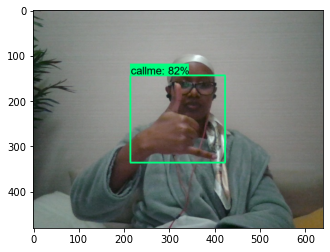

In [79]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

### real time detections from your webcam

In [80]:
!pip uninstall opencv-python-headless -y

In [81]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break


### Freezing the graph

In [82]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [83]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [84]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_tuned\export


In [85]:
!{command}

2022-02-25 20:52:30.767601: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 20:52:31.382425: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1309 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0225 20:52:32.018728 17592 deprecation.py:614] From C:\Users\steph\OneDrive\Documents\Datascience\AI Projects\object_detection\venv\lib\site-packages\tensorflow\p

W0225 20:52:52.045985 17592 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x000001D9DF25DAF0>, because it is not built.
W0225 20:52:52.046902 17592 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001DA2AFD30D0>, because it is not built.
W0225 20:52:52.046983 17592 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x000001DA2AFD3A30>, because it is not built.
W0225 20:52:52.046983 17592 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001DA2AFD3F10>, because it is not built.
W0225 20:52:52.046983 17592 save_impl.py:71] Skipping full serialization of Keras layer <keras.layers.core.lambda_layer.Lambda object at 0x000001DA2AFD3C10>, because it is not built.
W0225 20:52:52.046983 17592 save_impl

### Conversion to TFJS

In [86]:
!pip install tensorflowjs

In [87]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [88]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet_tuned\tfjsexport\model.json...


2022-02-25 21:50:15.236314: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 21:50:16.275170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
2022-02-25 21:50:31.600661: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-02-25 21:50:31.601283: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2022-02-25 21:50:31.611124: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

### Conversion to TFLite

In [89]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [90]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [91]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_tuned\tfliteexport


In [92]:
!{command}

2022-02-25 21:52:52.916755: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 21:52:53.509527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
2022-02-25 21:53:08.704607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
2022-02-25 21:53:12.314258: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:G

In [93]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [94]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [95]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet_tuned\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [96]:
!{command}

Estimated count of arithmetic ops: 1.723 G  ops, equivalently 0.861 G  MACs

2022-02-25 22:59:22.739367: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-25 22:59:24.052201: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1334 MB memory:  -> device: 0, name: NVIDIA GeForce MX250, pci bus id: 0000:02:00.0, compute capability: 6.1
2022-02-25 22:59:41.336399: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:363] Ignored output_format.
2022-02-25 22:59:41.336426: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:366] Ignored drop_control_dependency.
2022-02-25 22:59:41.336434: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:372] Ignored change_concat_input_ranges.
2022

### Zip and export Models

In [97]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')